In [43]:
!pip install ktrain
import ktrain
from ktrain import text
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
trainSet = pd.read_csv('/kaggle/input/sentnob-sentiment-analysis-in-noisy-bangla-texts/SentNoB Dataset/Train.csv')
testSet =  pd.read_csv('/kaggle/input/sentnob-sentiment-analysis-in-noisy-bangla-texts/SentNoB Dataset/Test.csv')

In [45]:
!pip install bnltk
!pip install bnlp-toolkit==4.0.0.dev4

In [46]:
#Tokenizer
from bnlp import NLTKTokenizer
bnltk = NLTKTokenizer()

#for Train Set
for i in range(0,trainSet.shape[0]):
    text = bnltk.word_tokenize(trainSet['Data'][i])
    trainSet['Data'][i] = text
#For Test Set   
for i in range(0,testSet.shape[0]):
    text = bnltk.word_tokenize(testSet['Data'][i])
    testSet['Data'][i] = text

In [47]:
trainSet.head()

,Data,Label
0,"[মুগ্ধ, হয়ে, গেলাম, মামু., আর, তোমায়, কি, কমু....",1
1,"[এই, কুত্তার, বাচ্চাদের, জন্য, দেশটা, আজ, এমন,...",2
2,"[ভাই, আপনার, কথাই, যাদু, রয়েছে]",1
3,"[উওরটা, আমার, অনেক, ভাল, লেগেছে]",1
4,"[আমার, নিজের, গাড়ী, নিয়ে, কি, সাজেক, যেতে, পা...",0


In [48]:
!pip install BnLemma

In [49]:
testSet.head()

,Data,Label
0,"[স্বাস্থ্যবান, হতে, চাই, ,, আমি, বয়সের, তুলনায়...",0
1,"[ভাইয়া, নতুন, ভিডিও, আসে, না, কেন]",0
2,"[সৌরভ, গাঙ্গুলী, ছাড়া, দাদাগিরি, কখনো, জমে, উঠ...",0
3,"[ক্রিকেট, কে, বাচাতে, হলে, পাপকে, অতিশিগ্রিই, ...",2
4,"[আমিতো, সেই, ঝালপ্রিয়ো, মানুষ]",1


In [50]:
from bnlp import BengaliCorpus as corpus

# print(corpus.stopwords)
# print(corpus.punctuations)
# print(corpus.letters)
# print(corpus.digits)
# print(corpus.vowels)

stop_words = set(corpus.stopwords)


for i in range(0,trainSet.shape[0]):
    words = trainSet['Data'][i]
    trainSet['Data'][i] =  str([word for word in words if word.lower() not in stop_words])
    

In [51]:
# stop_words = set(corpus.stopwords)


for i in range(0,testSet.shape[0]):
    words = testSet['Data'][i]
    testSet['Data'][i] =  str([word for word in words if word.lower() not in stop_words])

In [52]:
trainSet

,Data,Label
0,"['মুগ্ধ', 'হয়ে', 'গেলাম', 'মামু.', 'তোমায়', 'ক...",1
1,"['কুত্তার', 'বাচ্চাদের', 'দেশটা', 'অবস্তায়', '...",2
2,"['ভাই', 'কথাই', 'যাদু', 'রয়েছে']",1
3,"['উওরটা', 'ভাল', 'লেগেছে']",1
4,"['গাড়ী', 'সাজেক', 'পারবো', '?', 'প্রাইভেট', '...",0
...,...,...
12570,"['বর্ডারে', 'লেট', 'হয়ে', 'যাওয়াতে', 'জিপে', '...",1
12571,"['সোনার', 'বাংলাতে', 'রক্ষক', 'নামের', 'ভক্ষকে...",2
12572,"['ওনারা', 'হাইজিনিক', 'সুন্দর', 'পরিবেশে', 'রা...",1
12573,"['বাংলাদেশ', 'পুলিশ', 'চাই', 'ধরনে', 'পুলিশ', ...",2


In [53]:
from sklearn.model_selection import train_test_split
train = trainSet['Data'].values.tolist()
test = testSet['Data'].values.tolist()
train_cluster_id = trainSet['Label'].tolist()
test_cluster_id = testSet['Label'].tolist()

In [54]:
X_train = train
y_train = train_cluster_id
X_test = test
y_test = test_cluster_id

In [55]:
X_train

["['মুগ্ধ', 'হয়ে', 'গেলাম', 'মামু.', 'তোমায়', 'কমু.', 'বলো', 'তোমায়', 'কোথায়', 'পামু.', 'সাথে', 'যাবু.', 'গান', 'কমু', 'গলি', 'ঘুরমু.']",
 "['কুত্তার', 'বাচ্চাদের', 'দেশটা', 'অবস্তায়', 'তিনটা', 'পুলিশ', 'তরে', 'মেরে', 'পেলা', 'দরকার']",
 "['ভাই', 'কথাই', 'যাদু', 'রয়েছে']",
 "['উওরটা', 'ভাল', 'লেগেছে']",
 "['গাড়ী', 'সাজেক', 'পারবো', '?', 'প্রাইভেট', 'কার', '?']",
 "[':', 'পরীক্ষার', 'রেজাল্টের', 'সময়', ',', 'ব্যানিজ্যিক', 'প্রচার']",
 "['বিশ্বনন্দিত', 'বিশ্ব', 'জয়', 'ইসলামের', 'পাখিদের', 'কোরআনের', 'পাখিদের', 'খবর', 'আরিফ', 'অব্যয়', 'বোদার', 'বয়', 'সিঙ্গেল', 'বয়', 'জাতি', 'হিসেবে', 'বাঙালি', 'বর্তমানে', 'মুরুক্ষ', 'তারই', 'প্রমাণ', 'ঝাড়ু', 'মার', 'তোর', 'কপালে']",
 "['সাপ্তাহিক', 'মুসুল্লিদের', 'কথাটাও', 'ধরলে', 'ভাই', ',', 'চোখ', 'খুলে', 'দিছো']",
 "['ভেবেছিলাম', 'গালিগালাজ', 'সেরা', 'ছেলে', '?', 'গালিবয়']",
 "['রেপারই', 'হও', ',', 'ডাক্তার', 'হওয়ার', 'দরকার']",
 "['লেসবো', 'মেয়েটার', 'ফ্রেন্ড', 'টা', 'কিউট']",
 "['আচ্ছা', 'চারপাশে', 'অন্ধকার', '?', 'লাইট', 'টা', 'আপনাদের', 'টেব

In [56]:
import ktrain
from ktrain import text
MODEL_NAME = 'sagorsarker/bangla-bert-base'
t = text.Transformer(MODEL_NAME, maxlen=500)

In [57]:

y_train = [str(x) for x in train_cluster_id]
y_test = [str(x) for x in test_cluster_id]


In [58]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 11
	95percentile : 25
	99percentile : 33


Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 11
	95percentile : 25
	99percentile : 31


In [59]:
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=10)
history = learner.fit_onecycle(2e-5, 10)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
1258/1258 [==============================] - 935s 725ms/step - loss: 0.9550 - accuracy: 0.5363 - val_loss: 0.8658 - val_accuracy: 0.6021
Epoch 2/10
1258/1258 [==============================] - 905s 719ms/step - loss: 0.7875 - accuracy: 0.6491 - val_loss: 0.7826 - val_accuracy: 0.6551
Epoch 3/10
1258/1258 [==============================] - 906s 720ms/step - loss: 0.6629 - accuracy: 0.7157 - val_loss: 0.7835 - val_accuracy: 0.6709
Epoch 4/10
1258/1258 [==============================] - 906s 720ms/step - loss: 0.5290 - accuracy: 0.7852 - val_loss: 0.7724 - val_accuracy: 0.6728
Epoch 5/10
1258/1258 [==============================] - 906s 720ms/step - loss: 0.3805 - accuracy: 0.8491 - val_loss: 0.8906 - val_accuracy: 0.6627
Epoch 6/10
1258/1258 [==============================] - 906s 720ms/step - loss: 0.2532 - accuracy: 0.9040 - val_loss: 1.0128 - val_accuracy: 0.6879
Epoch 7/10
1258/1258 [===========================

In [60]:
learner.validate(class_names=t.get_classes()) 

50/50 [==============================] - 16s 260ms/step
              precision    recall  f1-score   support

           0       0.52      0.42      0.47       361
           1       0.73      0.76      0.75       654
           2       0.74      0.80      0.76       571

    accuracy                           0.70      1586
   macro avg       0.66      0.66      0.66      1586
weighted avg       0.69      0.70      0.69      1586



array([[153, 119,  89],
       [ 85, 496,  73],
       [ 56,  61, 454]])

In [61]:
def PlotGraph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'g', label='Training acc')
    plt.plot(x, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'g', label='Training loss')
    plt.plot(x, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend() 

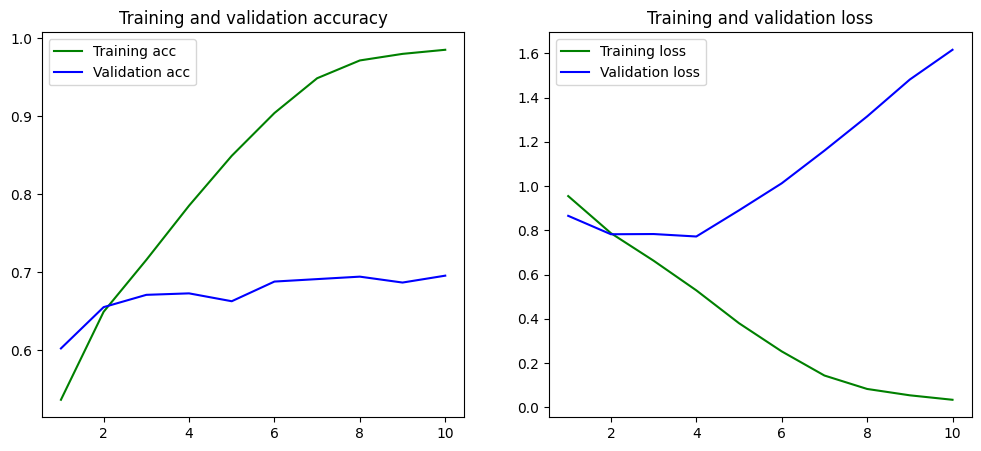

In [62]:
PlotGraph(history)